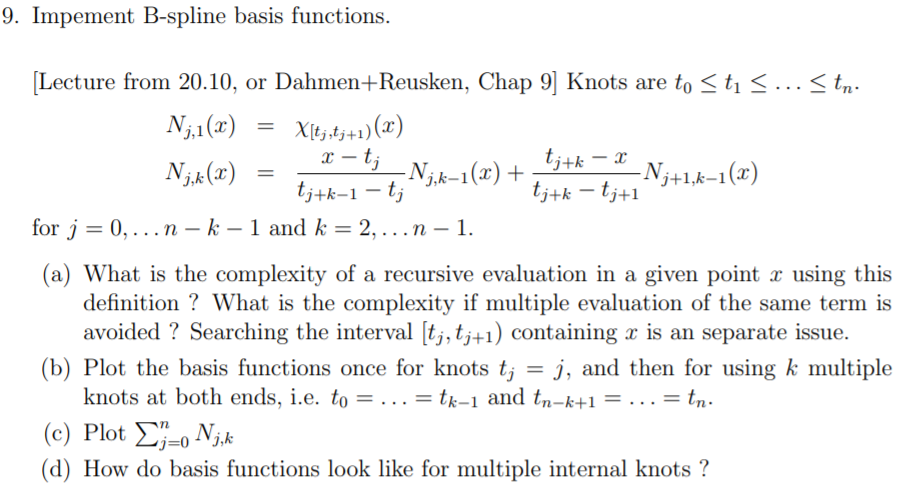

In [6]:
import numpy as np
import matplotlib.pyplot as plot

def BbasisRec (knots, j, k, x):
    if k == 1:
        if ((knots[j] - knots[j+1]) == 0 or x < knots[j] or x >= knots[j+1]):
            return 0.0
        else:
            return 1.0
    else:
        d1 = knots[j+k-1] - knots[j]
        d2 = knots[j+k] - knots[j+1]
        if d1 == 0.0:
            s1 = 0.0
        else:
            s1 = ((x-knots[j])/(knots[j+k-1]-knots[j]))*BbasisRec(knots, j, k-1, x)
        
        if d2 == 0.0:
            s2 = 0.0
        else:
            s2 = ((knots[j+k]-x)/(knots[j+k]-knots[j+1]))*BbasisRec(knots, j+1, k-1, x)
            
        return s1+s2

def Bbasis (knots, x, k):
    n = len(knots)-1
    N = np.zeros(n-k+1)
    for j in range(n-k+1):
        N[j] = BbasisRec(knots, j, k, x)
    return N

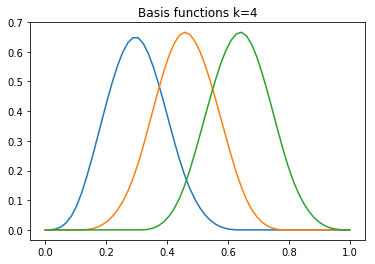

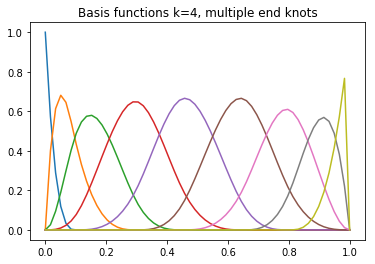

In [2]:
t1 = [0.0, 0.1, 0.3, 0.45, 0.65, 0.8, 1.0]        
t2 = [0.0, 0.0, 0.0, 0.0, 0.1, 0.3, 0.45, 0.65, 0.8, 1.0, 1.0, 1.0, 1.0]
X = np.linspace(0,1,60)
Y1 = [Bbasis(t1,x,4) for x in X]
Y2 = [Bbasis(t2,x,4) for x in X]
N1 = np.asarray(Y1)
N2 = np.asarray(Y2)

plot.title("Basis functions k=4")
plot.plot(X, N1[:])
plot.show()
plot.title("Basis functions k=4, multiple end knots")
plot.plot(X, N2[:])
plot.show()

(a): If n is the number of given knots and k the ordinance of the B-splines, there are n-k-1 basis functions. For each recursion step 2 recursive call are made. Thus the complexity should be in $O(n*2^k)$.
If multiple evaluation is avoided, we only need to make one recursive call in each recursion step, except for the first basis function. Thus the complexity would be in $O(n*k)$


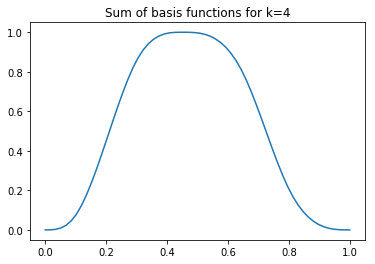

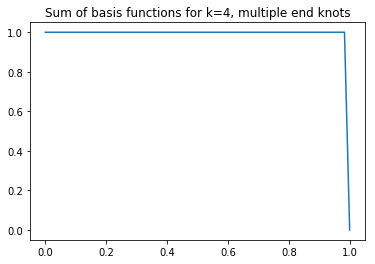

In [3]:
plot.title("Sum of basis functions for k=4")
plot.plot(X, np.sum(N1, axis=1))
plot.show()
plot.title("Sum of basis functions for k=4, multiple end knots")
plot.plot(X, np.sum(N2, axis=1))
plot.show()

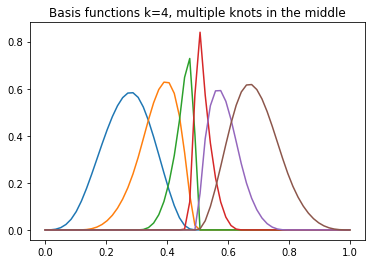

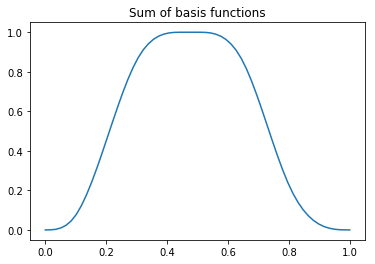

In [4]:
t3 = [0.0, 0.1, 0.3, 0.45, 0.5, 0.5, 0.5, 0.65, 0.8, 1.0]
Y3 = [Bbasis(t3,x,4) for x in X]
N3 = np.asarray(Y3)

plot.title("Basis functions k=4, multiple knots in the middle")
plot.plot(X, N3[:])
plot.show()
plot.title("Sum of basis functions")
plot.plot(X, np.sum(N3, axis=1))
plot.show()

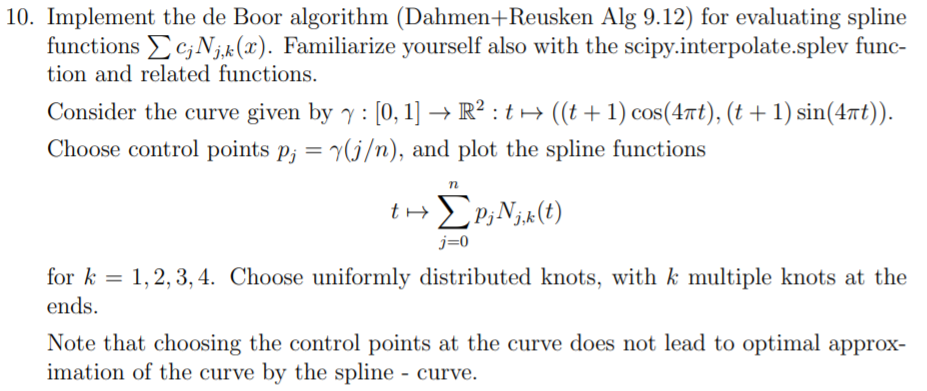

[ 1.          0.66802479 -0.25430964 -1.09403363 -1.15838854 -0.3019927
  0.89069972  1.5         0.97976969 -0.36557011 -1.54451806 -1.60887298
 -0.41325316  1.20244462  2.        ]
[ 1.          1.          0.66802479 -0.25430964 -1.09403363 -1.15838854
 -0.3019927   0.89069972  1.5         0.97976969 -0.36557011 -1.54451806
 -1.60887298 -0.41325316  1.20244462  2.          2.        ]
[ 1.          1.          1.          0.66802479 -0.25430964 -1.09403363
 -1.15838854 -0.3019927   0.89069972  1.5         0.97976969 -0.36557011
 -1.54451806 -1.60887298 -0.41325316  1.20244462  2.          2.
  2.        ]
[ 1.          1.          1.          1.          0.66802479 -0.25430964
 -1.09403363 -1.15838854 -0.3019927   0.89069972  1.5         0.97976969
 -0.36557011 -1.54451806 -1.60887298 -0.41325316  1.20244462  2.
  2.          2.          2.        ]


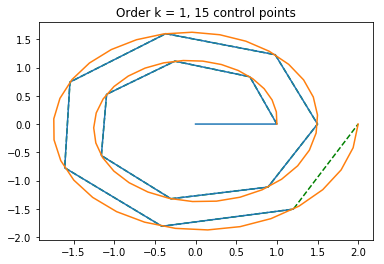

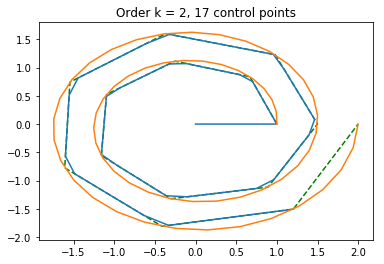

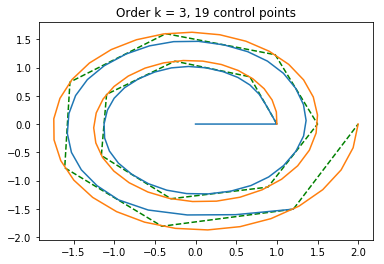

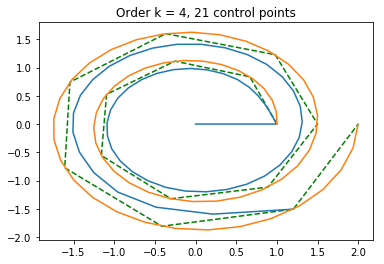

In [7]:
import numpy as np
import matplotlib.pyplot as plot
import bisect
from math import pi

def deBoor (knots, coeffs, k, x):
    m = bisect.bisect_left(knots, x)
    c = np.zeros(shape=(k, len(coeffs)))
    c[0][m-k:m] = coeffs[m-k:m]
    for p in range(1,k):
        for j in range(m-k+1+p,m+1):
            s1 = ((x-knots[j-1])/(knots[j+k-p-1]-knots[j-1]))*c[p-1][j-1]
            s2 = ((knots[j+k-p-1]-x)/(knots[j+k-p-1]-knots[j-1]))*c[p-1][j-1-1]
            c[p][j-1] = s1 + s2
    #print(c)
    return c[k-1][m-1]

def KnotExpanderLin (a, b, k, l):
    knots = np.linspace(a, b, l)
    for i in range(k-1):
        knots = np.concatenate(([knots[0]], knots, [knots[-1]]))
    return knots

T = np.linspace(0,1,60)
x = lambda t: (t+np.ones_like(t))*np.cos(4*pi*t)
y = lambda t: (t+np.ones_like(t))*np.sin(4*pi*t)


l = 15
for k in range(1,5):
    knots = KnotExpanderLin(0,1,k,l)
    n = len(knots)
    pt = knots
    px = x(pt)
    print(px)
    py = y(pt)
    Sx = [deBoor(knots, px, k, t) for t in T]
    Sy = [deBoor(knots, py, k, t) for t in T]
    plot.figure()
    plot.title("Order k = %d, %d control points" % (k, n))
    plot.plot(px, py, 'g--')
    plot.plot(Sx, Sy)
    plot.plot(x(T), y(T))
    plot.show
        